In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install pycaret -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 79.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 19.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 93.7 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 102.7 MB/s eta 0:00:0000:010:01
   ━

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
from pycaret.regression import *
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn'])
from sklearn import set_config
set_config(display='text')
import optuna
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
from datetime import datetime

In [23]:
# Load the dataset
df3 = pd.read_csv("/kaggle/input/barc-intern-1/OdettedataML1.csv")

In [24]:
# Normalize the features
df_norm2 = (df4 - df4.min()) / (df4.max() - df4.min())
df_norm2 = pd.concat((df_norm2, df3.DeltaYS), axis=1)

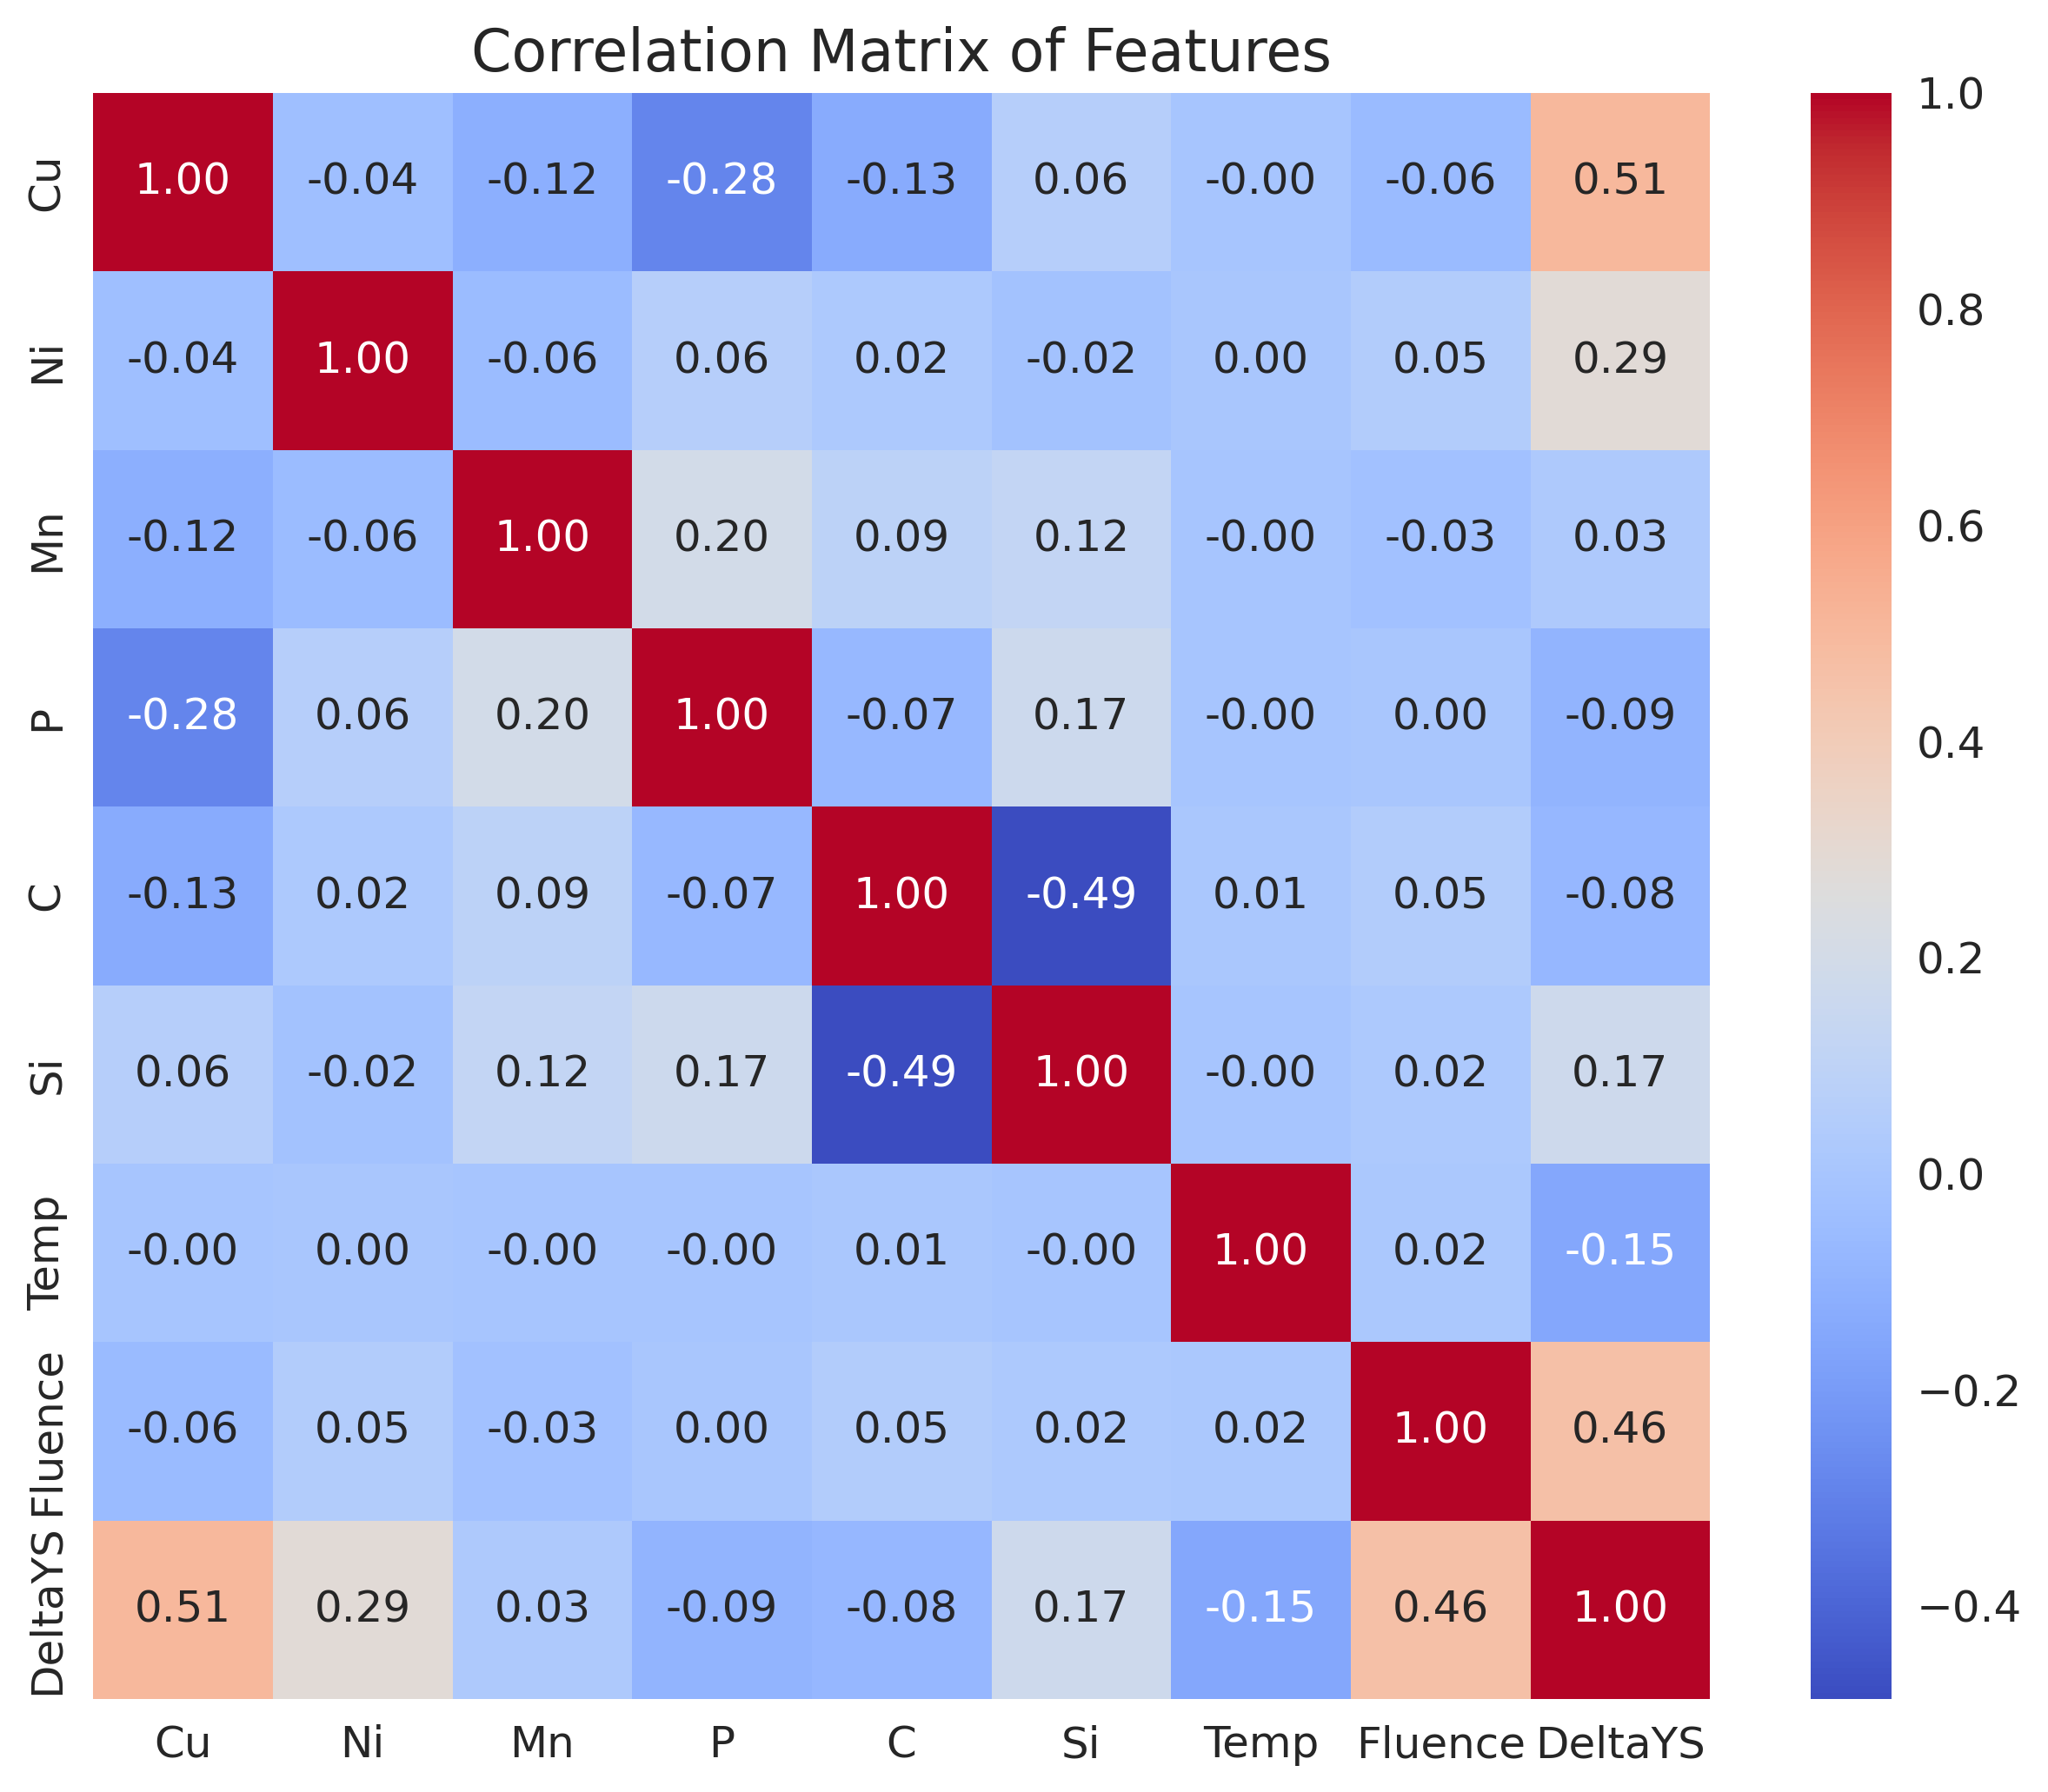

In [25]:
# Display the correlation matrix
correlation_matrix = df3.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.savefig('correlation_matrix.png')

In [27]:
# Set up PyCaret with cross-validation
# Using 5-fold cross-validation to ensure robust model evaluation
reg_setup = setup(data=df_norm2, target='DeltaYS', session_id=123, 
                 normalize=False,  # Already normalized
                 train_size=0.8,
                 fold=5,  # 5-fold cross-validation
                 verbose=False)


In [28]:
best_model = compare_models(sort='R2', n_select=1, verbose=True)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,56.3204,5253.9529,72.3082,0.0621,1.1089,2.8861,0.0760
rf,Random Forest Regressor,56.4496,5263.4314,72.3765,0.0603,1.1137,2.9294,0.1040
gbr,Gradient Boosting Regressor,56.4418,5266.1336,72.3927,0.0599,1.1104,2.9030,0.0440
catboost,CatBoost Regressor,56.5101,5265.2905,72.3904,0.0599,1.1155,2.9190,0.4800
dt,Decision Tree Regressor,56.4384,5274.8386,72.4485,0.0585,1.1147,2.8761,0.0120
lightgbm,Light Gradient Boosting Machine,56.6488,5274.4386,72.4503,0.0584,1.1184,2.9228,3.8980
xgboost,Extreme Gradient Boosting,56.4932,5275.7804,72.4689,0.0577,1.1172,2.9193,0.0460
ada,AdaBoost Regressor,59.5346,5495.4631,73.9101,0.0205,1.1708,3.3542,0.0240
lasso,Lasso Regression,59.4408,5596.4781,74.6673,-0.0009,1.1854,3.2902,0.0120
en,Elastic Net,59.4408,5596.4781,74.6673,-0.0009,1.1854,3.2902,0.0120


In [29]:
# Tune the best model 
tuned_model = tune_model(best_model, 
                        optimize='R2', 
                        n_iter=50,  
                        verbose=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,55.6191,5137.2042,71.6743,0.0855,1.0518,2.4685
1,60.0693,5614.6585,74.9310,0.0343,1.3183,4.3664
2,49.9778,3960.8729,62.9355,0.0909,0.9498,2.1196
3,59.1207,5583.2856,74.7214,0.0384,1.1094,2.8703
4,57.3720,6021.4278,77.5979,0.0535,1.1284,2.7413
Mean,56.4318,5263.4898,72.3720,0.0605,1.1115,2.9132
Std,3.5682,708.9172,5.0777,0.0236,0.1207,0.7708


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [30]:
final_model = finalize_model(tuned_model)

In [31]:
X = df_norm2.drop('DeltaYS', axis=1)
y = df_norm2['DeltaYS']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)

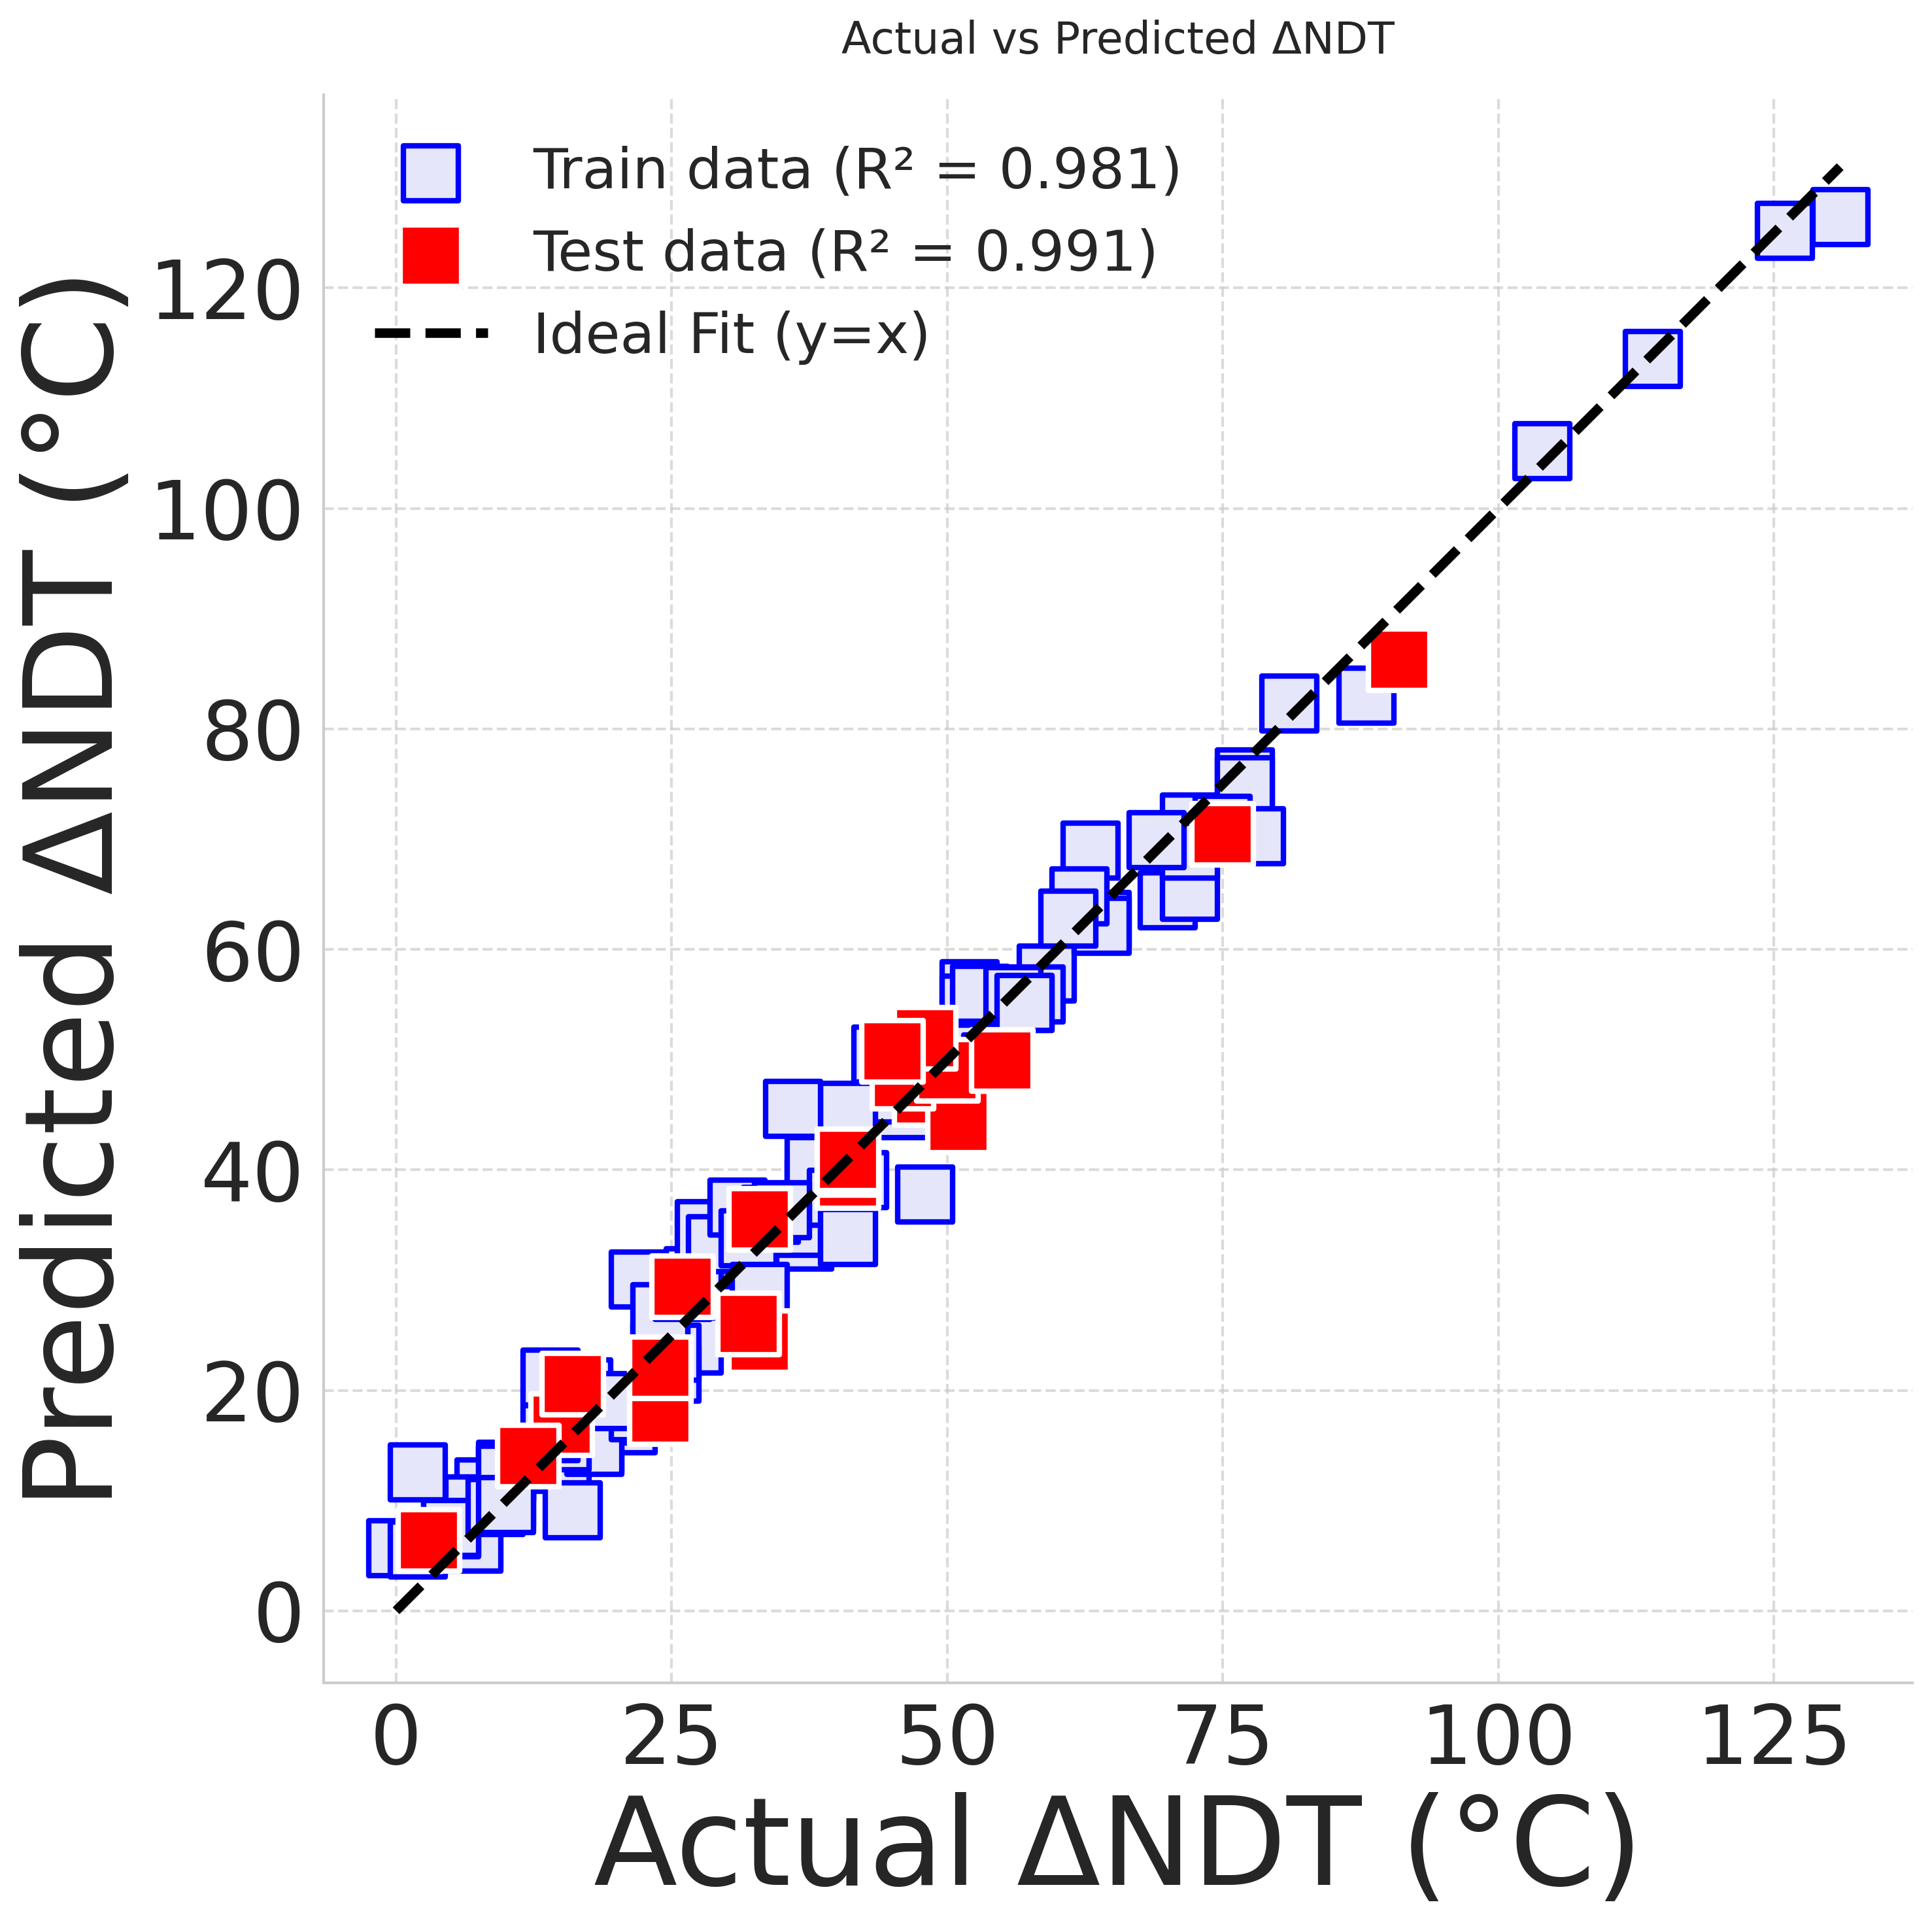

In [20]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid') 
from sklearn import set_config
set_config(display='text')
from datetime import datetime

plt.rcParams.update({
    'font.size': 12,
    'font.family': 'Times New Roman',
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'axes.spines.top': False,
    'axes.spines.right': False,
})



fig, ax = plt.subplots(figsize=(10, 10))  # Match the size from the example
ax.scatter(y_train, y_train_pred, s=400, marker='s', linewidth=2, edgecolors="blue", 
           color="lavender", label=f'Train data (R² = {train_r2_score:.3f})')
ax.scatter(y_test, y_test_pred, s=500, marker='s', linewidth=2, edgecolors="white", 
           color="red", label=f'Test data (R² = {final_r2_score:.3f})')
min_val = min(y.min(), min(y_train_pred.min(), y_test_pred.min()))
max_val = max(y.max(), max(y_train_pred.max(), y_test_pred.max()))
xl = yl = [min_val, max_val]
ax.plot(xl, yl, linestyle='dashed', color='black', linewidth=3.5, label='Ideal Fit (y=x)')
# Customize labels, legend, and ticks
ax.set_xlabel('Actual ΔNDT (°C)', fontsize=45)
ax.set_ylabel('Predicted ΔNDT (°C)', fontsize=45)
ax.set_title('Actual vs Predicted ΔNDT', fontsize=16, pad=15)
ax.legend(loc='upper left', fontsize='xx-large', facecolor='w', edgecolor='black')
ax.tick_params(axis='both', which='major', labelsize=30)
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_aspect('equal', adjustable='box')
plt.tight_layout()

TypeError: Axes.text() got multiple values for argument 'x'

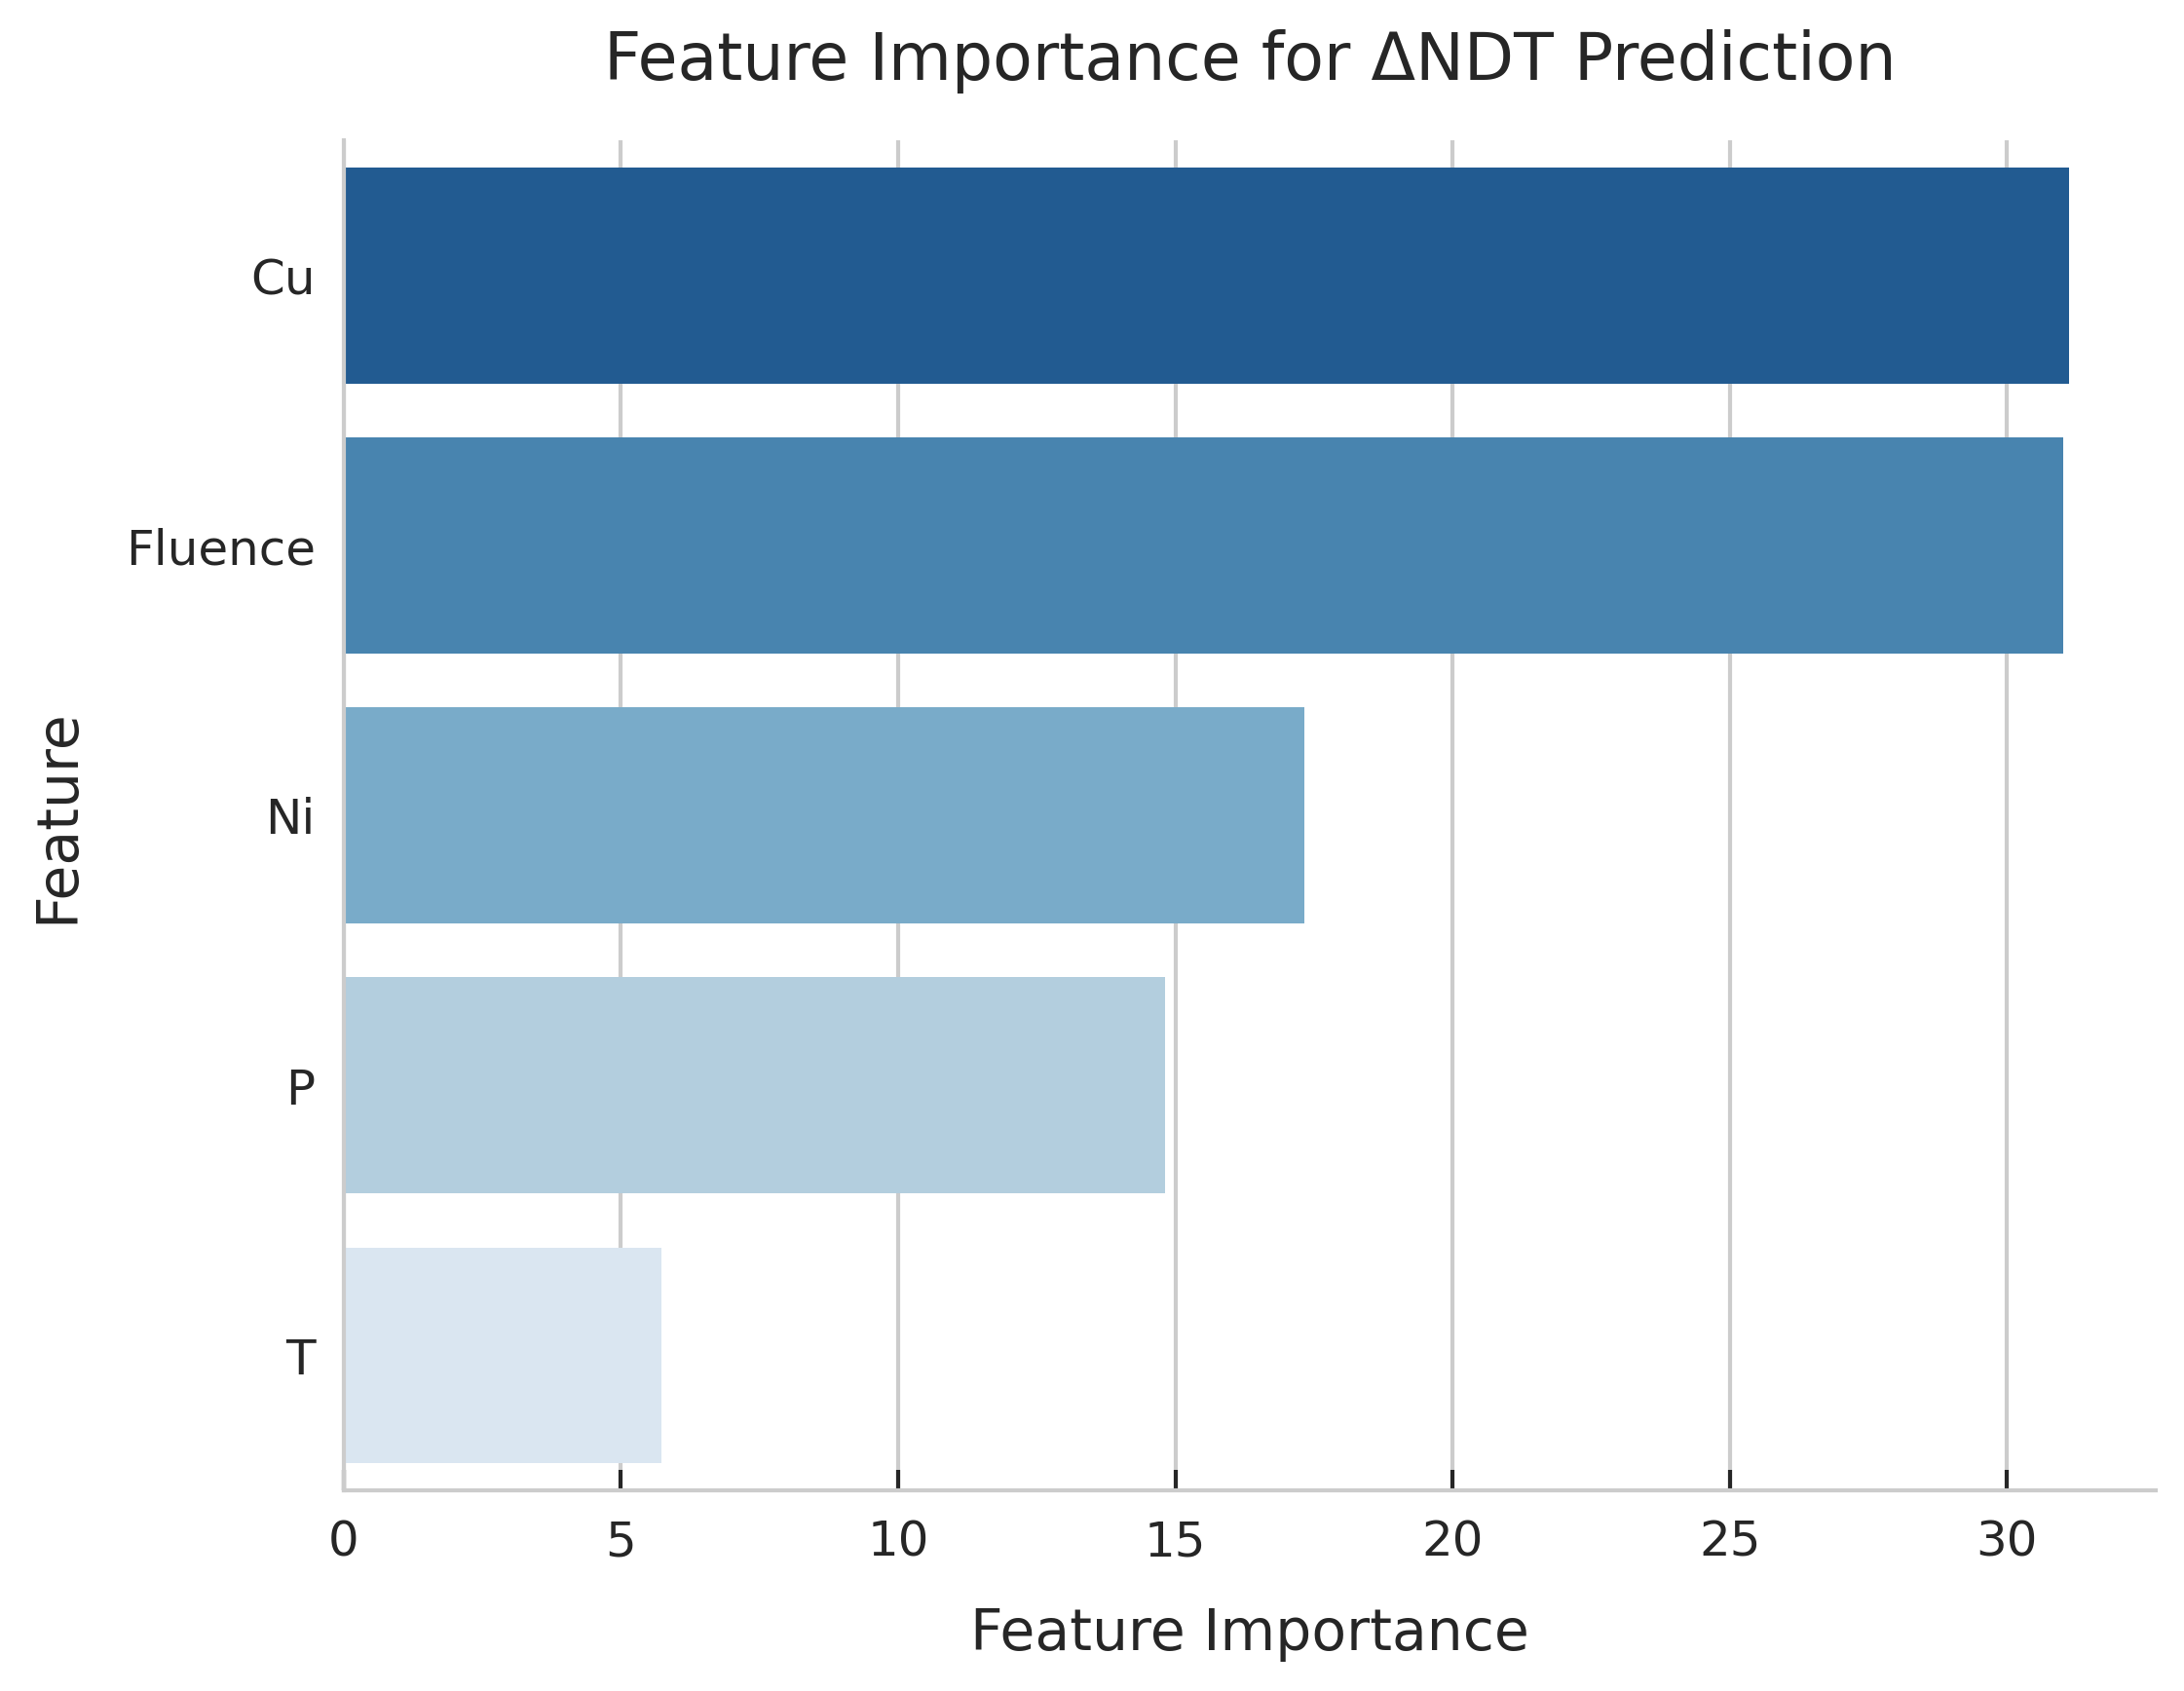

In [15]:
if hasattr(final_model, 'feature_importances_'):
    feature_importance = final_model.feature_importances_
    feature_names = df_norm2.drop('DeltaNDT', axis=1).columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues_r', ax=ax)
    ax.set_xlabel('Feature Importance', fontsize=14, labelpad=10)
    ax.set_ylabel('Feature', fontsize=14, labelpad=10)
    ax.set_title('Feature Importance for ΔNDT Prediction', fontsize=16, pad=15)
    ax.tick_params(axis='both', which='major', direction='in', length=5)
    for i, v in enumerate(importance_df['Importance']):
        ax.text(v, i, f'{v:.2f}', va='center', ha='left', fontsize=10, color='black', x=v + 0.02)
    plt.tight_layout()
    plt.savefig('feature_importance_professional.png', bbox_inches='tight', dpi=300)
else:
    print("Feature importance not available for this model.")

In [17]:
!pip install shap -q


In [18]:
import shap
pd.set_option('display.max_columns', None)
shap.initjs()

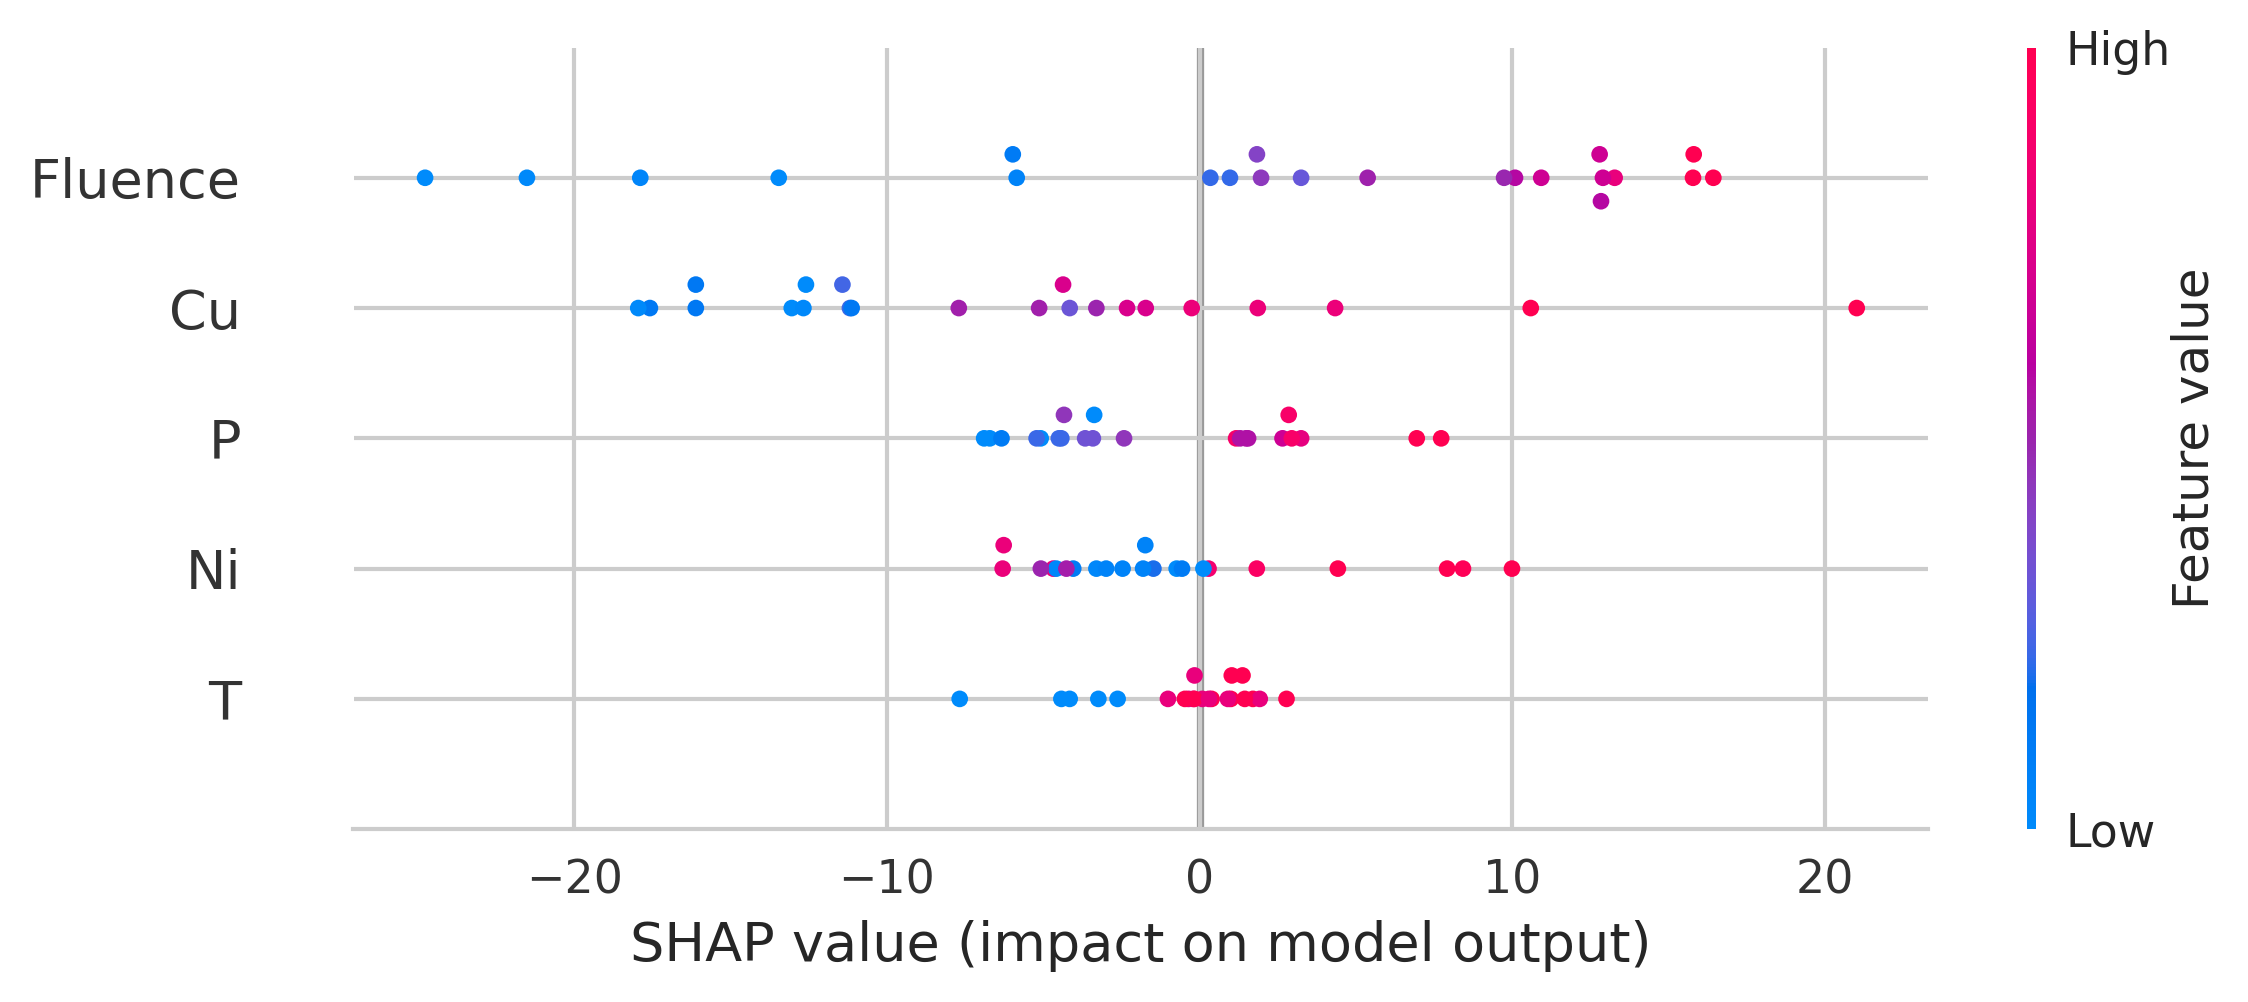

In [19]:
interpret_model(best_model)
